<a href="https://colab.research.google.com/github/RashmiThakre/Tasks.Codtech/blob/main/Task_5Codtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()

# Load the data
df=pd.read_csv('/content/^NSEI.csv')

df = pd.read_csv('/content/^NSEI.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-29,19374.849609,19377.900391,19309.099609,19342.650391,19342.650391,307400
2023-08-30,19433.449219,19452.800781,19334.750000,19347.449219,19347.449219,233000
2023-08-31,19375.550781,19388.199219,19223.650391,19253.800781,19253.800781,562600
2023-09-01,19258.150391,19458.550781,19255.699219,19435.300781,19435.300781,333000
2023-09-04,19525.050781,19545.150391,19432.849609,19528.800781,19528.800781,296800


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


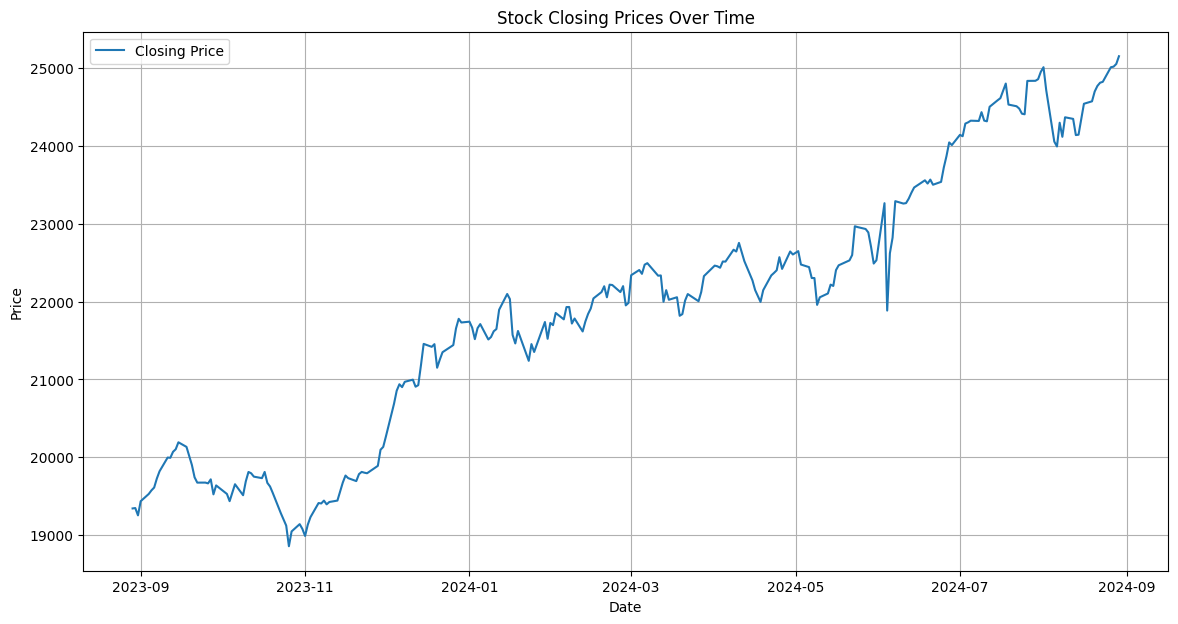

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if necessary
df = df.dropna()

# Visualize the stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] > 0.05:
    print("The time series is not stationary. Consider differencing.")
else:
    print("The time series is stationary.")

ADF Statistic: -0.255754240625332
p-value: 0.9315412895773976
The time series is not stationary. Consider differencing.


In [7]:
# Use auto_arima to find the best parameters for ARIMA model
!pip install pmdarima
from pmdarima import auto_arima
model = auto_arima(df['Close'],
                   start_p=1, start_q=1,
                   max_p=5, max_q=5, m=1,
                   start_P=0, seasonal=False,
                   d=None, D=0, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3245.304, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3250.470, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3243.861, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3244.486, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3252.374, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3245.648, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3246.689, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3247.538, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 5.108 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1618.930
Date:                Thu, 29 Aug 2024 

In [8]:
# Fit the ARIMA model
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=model.order)
arima_fit = arima_model.fit()

print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  196
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1297.364
Date:                Thu, 29 Aug 2024   AIC                           2598.728
Time:                        11:19:38   BIC                           2605.274
Sample:                             0   HQIC                          2601.378
                                - 196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2116      0.041     -5.127      0.000      -0.293      -0.131
sigma2      3.524e+04   2050.226     17.188      0.000    3.12e+04    3.93e+04
Ljung-Box (L1) (Q):                   0.08   Jarque-

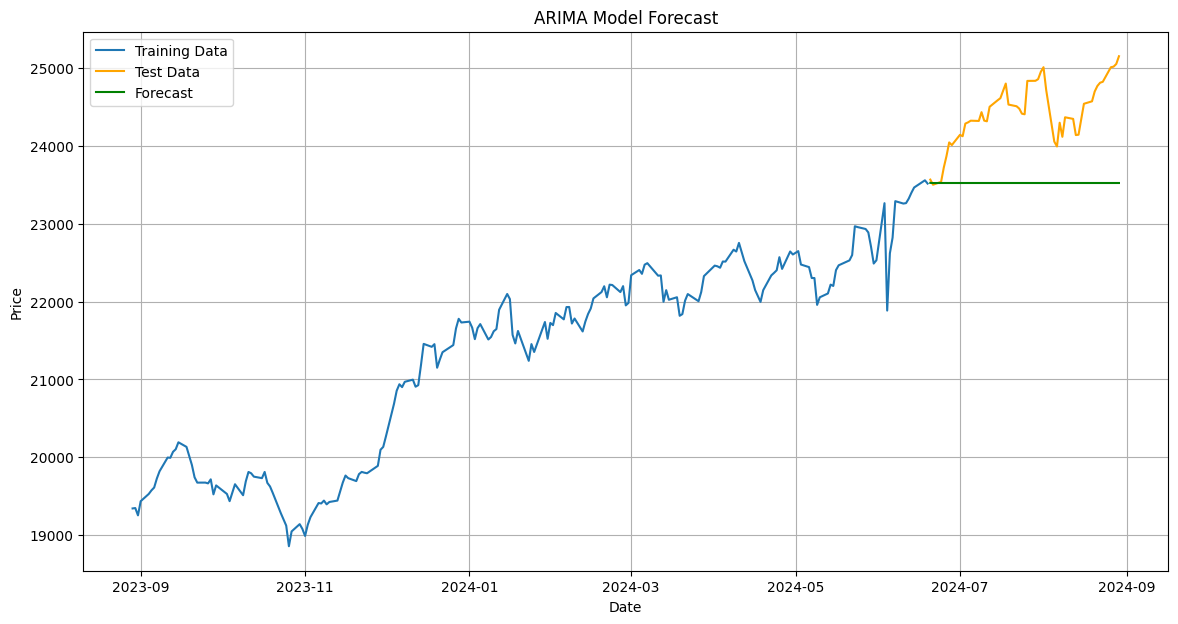

In [9]:
# Forecast
forecast = arima_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 901.6946579281425
Mean Squared Error: 974032.0546824775
Root Mean Squared Error: 986.9306230341003
